<a href="https://colab.research.google.com/github/KatiaKozlova/stat-project/blob/main/stat_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experimental Research in Degree Semantics

Notebook by *Daria Sidorkina* & *Kate Kozlova*

### **Libraries**:

In [2]:
knitr::opts_chunk$set(warning = FALSE, message = FALSE)

In [ ]:
install.packages('rstatix')
install.packages('egg', dependencies = TRUE)
install.packages('effsize')

In [ ]:
library(dplyr)
library(tidyverse)
library(jsonlite)
library(rstatix)
library(ggplot2)
library(effsize)

## **Experiment 1**

### **Import of the collected data**:

In [1]:
lion_exp <- read.csv(
    'https://raw.githubusercontent.com/KatiaKozlova/stat-project/refs/heads/main/results/exp1/results_exp1.csv'
    )

### **Data pre-processing and statistics**:

In [ ]:
# omitting the time-stamps and division into 4 groups

lion_exp <- lion_exp[, -c(1:2)]

In [ ]:
# minimal, maximal, average of each sentence
# number and standart deviation

lion_exp_stats <- as.data.frame(t(sapply(
    lion_exp,
    function(x) c(
        avg = mean(x, na.rm = TRUE),
        min = min(x, na.rm = TRUE),
        max = max(x, na.rm = TRUE),
        st_dev = sd(x, na.rm = TRUE),
        count = length(which(!is.na(x)))
        )
        )))

In [ ]:
# adding rownames

lion_exp_stats <- rownames_to_column(lion_exp_stats, var = 'stimuli')
lion_exp_stats <- tibble::rowid_to_column(lion_exp_stats, 'id')

In [ ]:
# manually omitting fillers (only stimuli are left)

lion_stimuli <- lion_exp_stats[
    -c(1, 3, 6, 10, 11, 18, 19, 20,
    24, 29, 34, 35, 37, 38, 39, 40,
    43, 45, 46, 50, 51, 53, 58, 60,
    62, 65, 68, 69, 72, 76, 78, 80), -1]

rownames(lion_stimuli) <- 1:nrow(lion_stimuli)

In [ ]:
# solving several problems
# (doubled sentence and broken encoding)

mean_ch <- mean(lion_stimuli$avg[c(20, 39)])
sum_ch <- sum(lion_stimuli$count[c(20, 39)])
lion_stimuli$avg[20] <- mean_ch
lion_stimuli$count[20] <- sum_ch
lion_stimuli <- lion_stimuli[-39, ]
rownames(lion_stimuli) <- 1:nrow(lion_stimuli)

lion_stimuli <- lion_stimuli %>%
  mutate(stimuli = str_replace_all(stimuli, '\\.\\.', '\\,\\ ')) %>%
    mutate(stimuli = str_replace_all(stimuli, '\\.', '\\ '))

In [ ]:
# ordering in alphabetical order (groups by four)
# saving as CSV

lion_stimuli_sorted <- lion_stimuli[order(lion_stimuli$stimuli),]

write.csv(lion_stimuli_sorted, 'results_exp1_statistics.csv', row.names = FALSE)

### **Data analysis and preliminary findings**:

We took 4 as minimum average score of the sentence to be considered as acceptable (according to the human reasoning).

In [ ]:
lion_stimuli_sorted[lion_stimuli_sorted$avg > 4, ]

,stimuli,avg,min,max,st_dev,count
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
19,Вода в ванне немного горячая,4.303030,2,5,0.8472326,33
5,Вода в ванне немного холодная,4.352941,1,5,1.2030858,34
33,Вода в ванне совершенно холодная,4.423077,2,5,0.8566482,26
45,Все студенты в пятой группе немного ленивые,4.647059,2,5,0.7337059,34
14,Интернет в общежитии немного медленный,4.363636,1,5,1.2946569,33
44,Комната Вадика немного тёмная,4.470588,2,5,0.8611231,34
3,Комната Вадика совершенно тёмная,4.264706,1,5,0.9941899,34
41,Лицо на той картине немного уродливое,4.235294,1,5,1.1821609,34
24,Лицо на той картине совершенно уродливое,4.333333,2,5,0.9895285,33


**Our findings**:

Adjectives in bold font represent **prevalence** in acceptability of modification with degree modifiers or the only possible variant of modification.

Three acceptable collocations:
- **грязный** – чистый (dirty – clean, *чистый* with *совершенно* (completely));
- **холодный** – горячий (cold – hot, *горячий* with *немного* (slightly)).

Two acceptable collocations:
- светлый – **тёмный** (light – dark);
- умный – **глупый** (smart – stupid);
- красивый – **уродливый** (beautiful – ugly).

One acceptable collocations (all with *немного* (slightly)):
- быстрый – **медленный** (fast – slow);
- **злой** – добрый (good – bad)$^1$;
- **ленивый** – трудолюбивый (lazy – hard-working);
- храбрый – **трусливый** (brave – fearful).

Zero acceptable collocations:
- щедрый – скупой (generous – stingy);
- высокий – низкий (tall – short);
- тяжёлый – лёгкий (heavy – light).


$^1$ It should be mentioned that we accidentally skiped one variant *совершенно добрый* (completely kind).

## **Experiment 2**

### **Import of the collected data**:

In [5]:
# opening JSON and making a tibble out of it

raw_second_exp <- fromJSON(
    'https://raw.githubusercontent.com/KatiaKozlova/stat-project/refs/heads/main/results/exp2/results_exp2.json',
    flatten=TRUE
    ) %>% as_tibble()

In [6]:
# reframing and transposing into a dataframe

flatten_second_exp <- raw_second_exp %>%
  mutate(across(where(is.list), as.character))

second_exp <- flatten_second_exp[-1] %>%
  t() %>%
    as.data.frame() %>%
      setNames(
        c('id_person', 'id_item',
        'id_list', 'adjective',
        'filler', 'judgement',
        'print_time', 'judge_time')
        )

In [7]:
# converting columns to numeric type

second_exp <- transform(
    second_exp,
    judgement = as.numeric(judgement),
    print_time = as.numeric(print_time),
    judge_time = as.numeric(judge_time)
    )

In [8]:
# creating a column with timing of each answer

second_exp$clean_time <- (second_exp$judge_time - second_exp$print_time) / 1000

### **Data pre-processing**:

1. First, we want to delete all the people whose answers on control questions were wrong, since they do not pass the adequacy test.
There were three control questions:

> 0: *Только самый маленький смурф принёс с собой бахилы. ⇝ Самый большой смурф принёс с собой бахилы.*<br>(*Only the smallest Smurf brought shoe covers with him. ⇝ The biggest Smurf brought shoe covers with him.*)

> 00: *Клёпа забыла, что в столовой не принимают карты. ⇝ В столовой не принимают карты.*<br>(*Cleopatra forgot that they don't accept cards in the dining room. ⇝ The dining room does not accept cards.*)

> 000: *В группе нет никого зануднее Андрея. ⇝ Андрей самый занудный в группе.*<br>(*There is no one in the group more nerdy than Andrew. ⇝ Andrew is the most nerdy in the group.*)

The answers to them are obviously *False*, *True* and *True*, accordingly. We accepted 4 and 5 as true judgements, and 1 and 2 as false judgements.

In [9]:
# illustations

stimuli <- read.csv(
    'https://raw.githubusercontent.com/KatiaKozlova/stat-project/refs/heads/main/results/exp2/stimuli_exp2.csv',
    colClasses=c('item'='character')
    )

head(stimuli[stimuli$item %in% c('0', '00', '000'), ], 3)

,code,group,item,adj,filler,item_text,item_goal
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1221099,A,0,-,control,Только самый маленький смурф принёс с собой бахилы.,Самый большой смурф принёс с собой бахилы.
2,1221099,A,00,-,control,"Клёпа забыла, что в столовой не принимают карты.",В столовой не принимают карты.
3,1221099,A,000,-,control,В группе нет никого зануднее Андрея.,Андрей самый занудный в группе.


In [10]:
# creating a df with control questions

control_questions <- second_exp[second_exp$filler == 'control',]

In [11]:
# spotting unadequate judgments

unadequate_0 <- control_questions[control_questions$id_item == '0' & !(control_questions$judgement %in% c('1', '2')),]$id_person
unadequate_00 <- control_questions[control_questions$id_item == '00' & !(control_questions$judgement %in% c('4', '5')),]$id_person
unadequate_000 <- control_questions[control_questions$id_item == '000' & !(control_questions$judgement %in% c('4', '5')),]$id_person

unadequates <- unique(c(unadequate_0, unadequate_00, unadequate_000))

In [12]:
# deleting these users

second_exp <- second_exp[!(second_exp$id_person %in% unadequates),]

2. Second, among other means, we were also using *Yandex.Toloka*, which allow its' users to get paid for completing easy tasks, such as filling in some questioners. However, one of its' problems include an "unfair game" where subjects may choose answers randomly. Thus, we want to manually detect such users that their timing repeatedly was less than a second per answer and delete them as outliers.

In [13]:
# detecting automatic answers

automatic_answers <- second_exp[second_exp$clean_time < 1,] %>%
  group_by(id_person) %>%
    summarise(n = n())

automatic_answers <- automatic_answers[automatic_answers$n > 1,]

In [14]:
# deleting the only unfair player left

second_exp <- second_exp[!(second_exp$id_person %in% automatic_answers$id_person),]

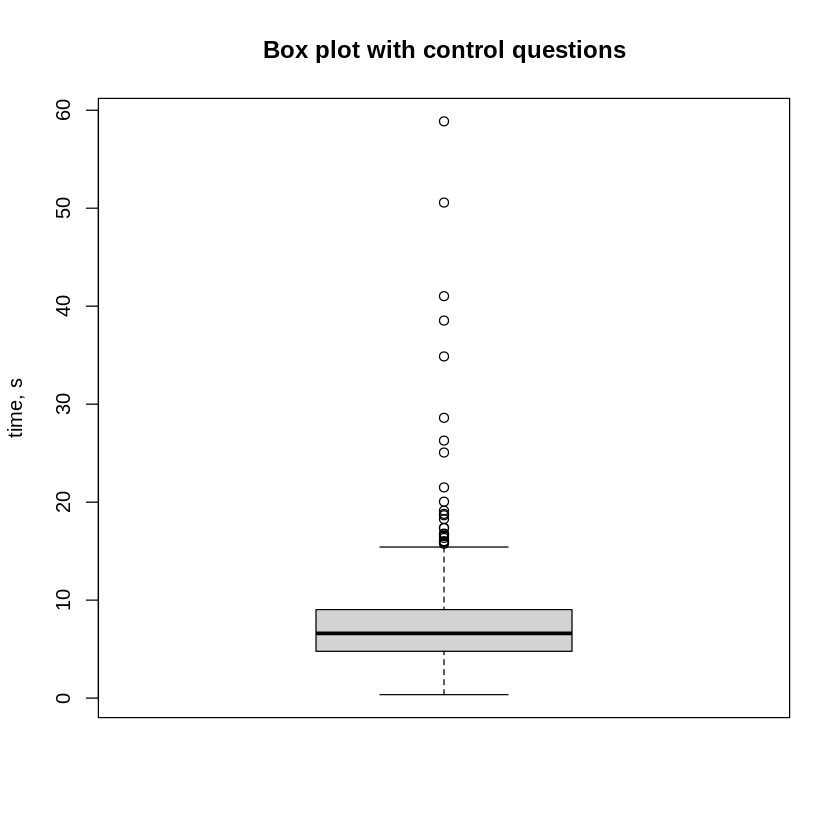

In [15]:
# illustrating via boxplot

boxplot(control_questions$clean_time,
  ylab = 'time, s',
  main = 'Box plot with control questions'
)

3. Third, there are still some random unique outliers:
    - time of answer is more than 100s,
    - time of answer is less than 1s.

In [16]:
summary(second_exp$clean_time)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   0.437    5.657    8.209   13.980   11.691 4155.141 

In [17]:
second_exp <- second_exp[second_exp$clean_time < 100 & second_exp$clean_time > 1,]

### **Calculating the statistics**

#### *General statistics*

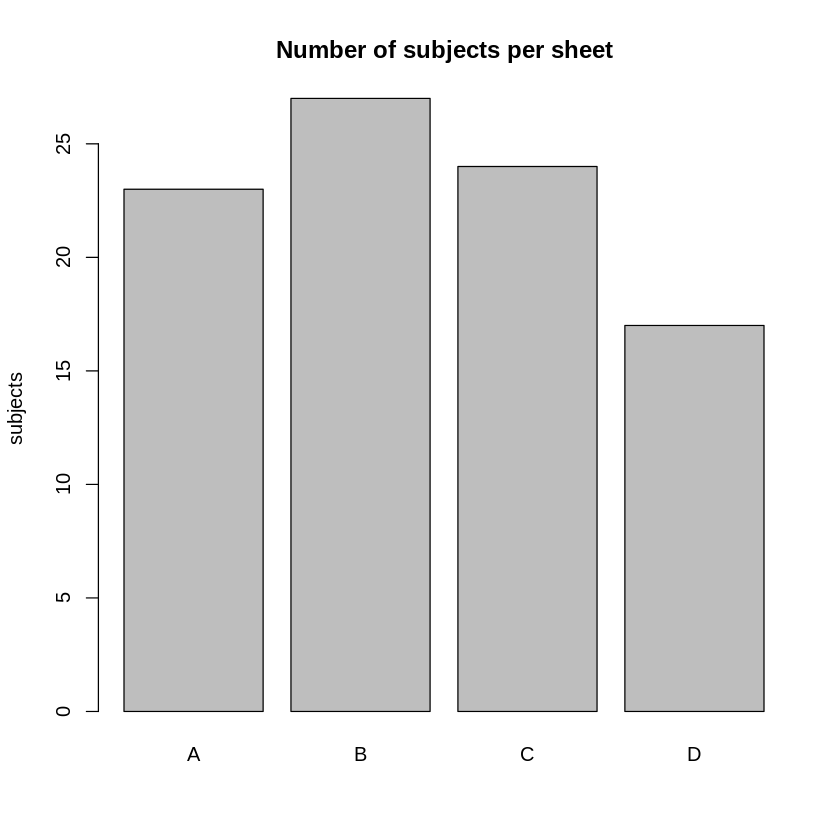

In [18]:
# visualizing number of subjects per sheet

grouped_data <- second_exp %>%
  group_by(id_list) %>%
    summarise(n_people = n_distinct(id_person))

barplot(
    height=pull(grouped_data, n_people),
    names=pull(grouped_data, id_list),
    ylab='subjects',
    main='Number of subjects per sheet'
    )

In [19]:
# time summary

summary(second_exp$clean_time)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.467   5.657   8.202   9.940  11.666  86.977 

In [20]:
# illustrating time via boxplot and histogram

plt1 <- second_exp %>% select(clean_time) %>%
  ggplot(aes(x='', y = clean_time)) +
  geom_boxplot(fill = 'grey', color = 'black') +
  coord_flip() +
  theme_classic() +
  xlab('') +
  ylab('Clean time, s') +
  theme(axis.text.y=element_blank(),
        axis.ticks.y=element_blank())

plt2 <- second_exp %>% select(clean_time) %>%
  ggplot() +
  geom_histogram(aes(x = clean_time, y = after_stat(count)/sum(after_stat(count))),
                 position = 'identity', binwidth = 1,
                 fill = 'grey', color = 'black') +
  ylab('Relative Frequency') +
  xlab('Clean time, s') +
  theme_classic()

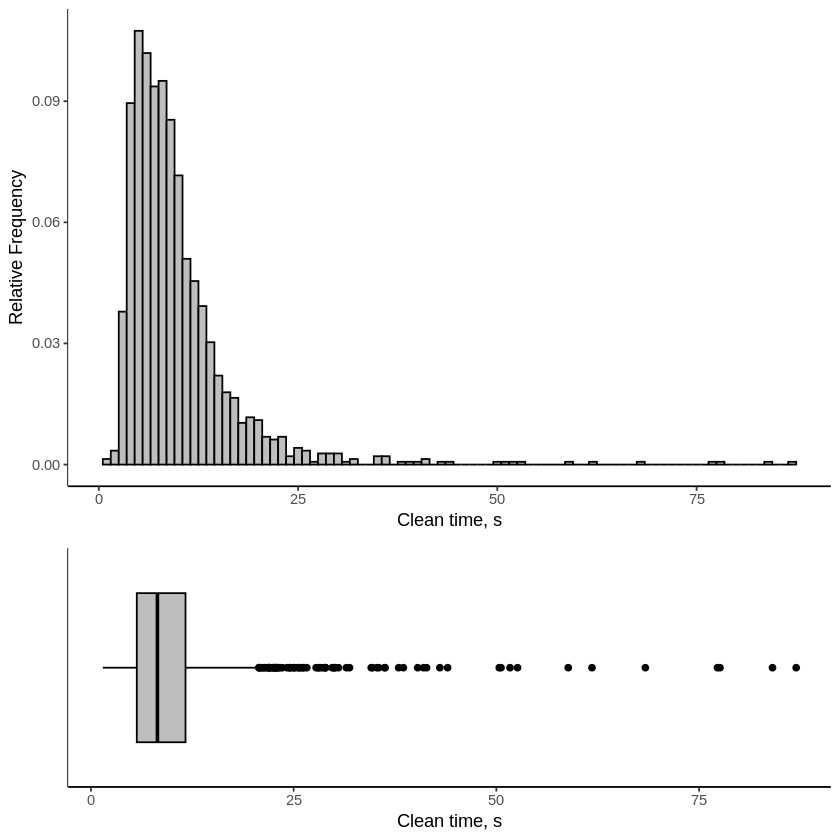

In [21]:
egg::ggarrange(plt2, plt1, heights = 2:1)

#### *Checking for normal distribution*

First, we need to ensure reaction times are approximately normally distributed to use t-test.

In [98]:
# extracting baseline (controls), target and adjectives

baseline_data <- subset(second_exp, filler == 'control')
target_data <- subset(second_exp, filler == 'false')
adjectives <- unique(target_data$adjective)
groups <- as.numeric(unique(target_data[, c('id_item', 'adjective')])$id_item)

In [99]:
# performing Shapiro-Wilk Test to test for normality
# (assume that data is normally distributed)

results <- list()

for (adj in adjectives) {
  adj_times <- target_data$clean_time[target_data$adjective == adj]
  normal_result <- shapiro.test(adj_times)
  results[[adj]] <- normal_result
}

In [100]:
# extracting and displaying p-values

p_values <- sapply(results, function(x) round(x$p.value, 5))
result <- data.frame(
  group = groups,
  pvalue = p_values
)
result <- result[order(result$group),]

In [101]:
result

,group,pvalue
,<dbl>,<dbl>
грязная,8,0.00041
чистая,8,0.00981
холодная,9,0.49028
горячая,9,0.01184
щедрая,10,0.00001
скупая,10,0.00000
светлая,11,0.00976
тёмная,11,0.38185
красивая,12,0.00060


As you can see, the null hypothesis is violated for almost every adjective. Thus, we can say that reaction times are **not** normally distributed.

#### *Non-parametric approach*

Let's try Wilcoxon rank-sum test with comuting Cliff's delta then.

- Significant p-value ($\text{adjusted_pvalue} < 0.05$): *the adjective's reaction time distribution differs significantly from the baseline*.

- Cliff's delta:
    - $|Δ| > 0.147$: *small effect*.
    - $|Δ| > 0.33$: *medium effect*.
    - $|Δ| > 0.474$: *large effect*.

In [102]:
# performing Wilcoxon rank-sum test

wilcox_results <- list()

for (adj in adjectives) {
  adj_times <- target_data$clean_time[target_data$adjective == adj]
  test_result <- wilcox.test(adj_times, baseline_data$clean_time)
  wilcox_results[[adj]] <- test_result
}

In [103]:
# extracting p-values, adjusting for multiple testing and creating results table

p_values <- sapply(wilcox_results, function(x) x$p.value)
adjusted_p <- p.adjust(p_values, method = 'fdr')

results_table <- data.frame(
  group = groups,
  pvalue = p_values,
  adjusted_pvalue = adjusted_p
)

In [104]:
# сomputing Cliff's delta for each adjective

cliff_results <- list()

for (adj in adjectives) {
  adj_times <- target_data$clean_time[target_data$adjective == adj]
  delta <- cliff.delta(adj_times, baseline_data$clean_time)
  cliff_results[[adj]] <- delta
}

In [105]:
# a function to interpret Cliff's deltas

interpret_cliffs_delta <- function(delta) {
  abs_delta <- abs(delta)
  case_when(
    abs_delta < 0.147 ~ 'negligible',
    abs_delta < 0.33 ~ 'small',
    abs_delta < 0.474 ~ 'medium',
    TRUE ~ 'large'
  )
}

In [108]:
# extracting Cliff's deltas, interpreting and adding to results table

effect_sizes <- sapply(cliff_results, function(x) x$estimate)
delta_effect <- interpret_cliffs_delta(effect_sizes)

results_table$cliffs_delta <- effect_sizes
results_table$delta_interpretation <- delta_effect
results_table <- results_table[order(results_table$group),]

In [109]:
# the results

results_table

,group,pvalue,adjusted_pvalue,cliffs_delta,delta_interpretation
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
грязная,8,0.835222283,0.91115158,0.026278070,negligible
чистая,8,0.150977002,0.25881772,0.167684168,small
холодная,9,0.000797953,0.01915087,0.421245421,medium
горячая,9,0.131701529,0.25881772,0.179064525,small
щедрая,10,0.729148684,0.83331278,0.043637522,negligible
скупая,10,0.033532902,0.11308294,0.248134581,small
светлая,11,0.985832842,0.98583284,-0.002388915,negligible
тёмная,11,0.215995836,0.32399375,0.144485144,negligible
красивая,12,0.008620653,0.06896522,0.329988852,small


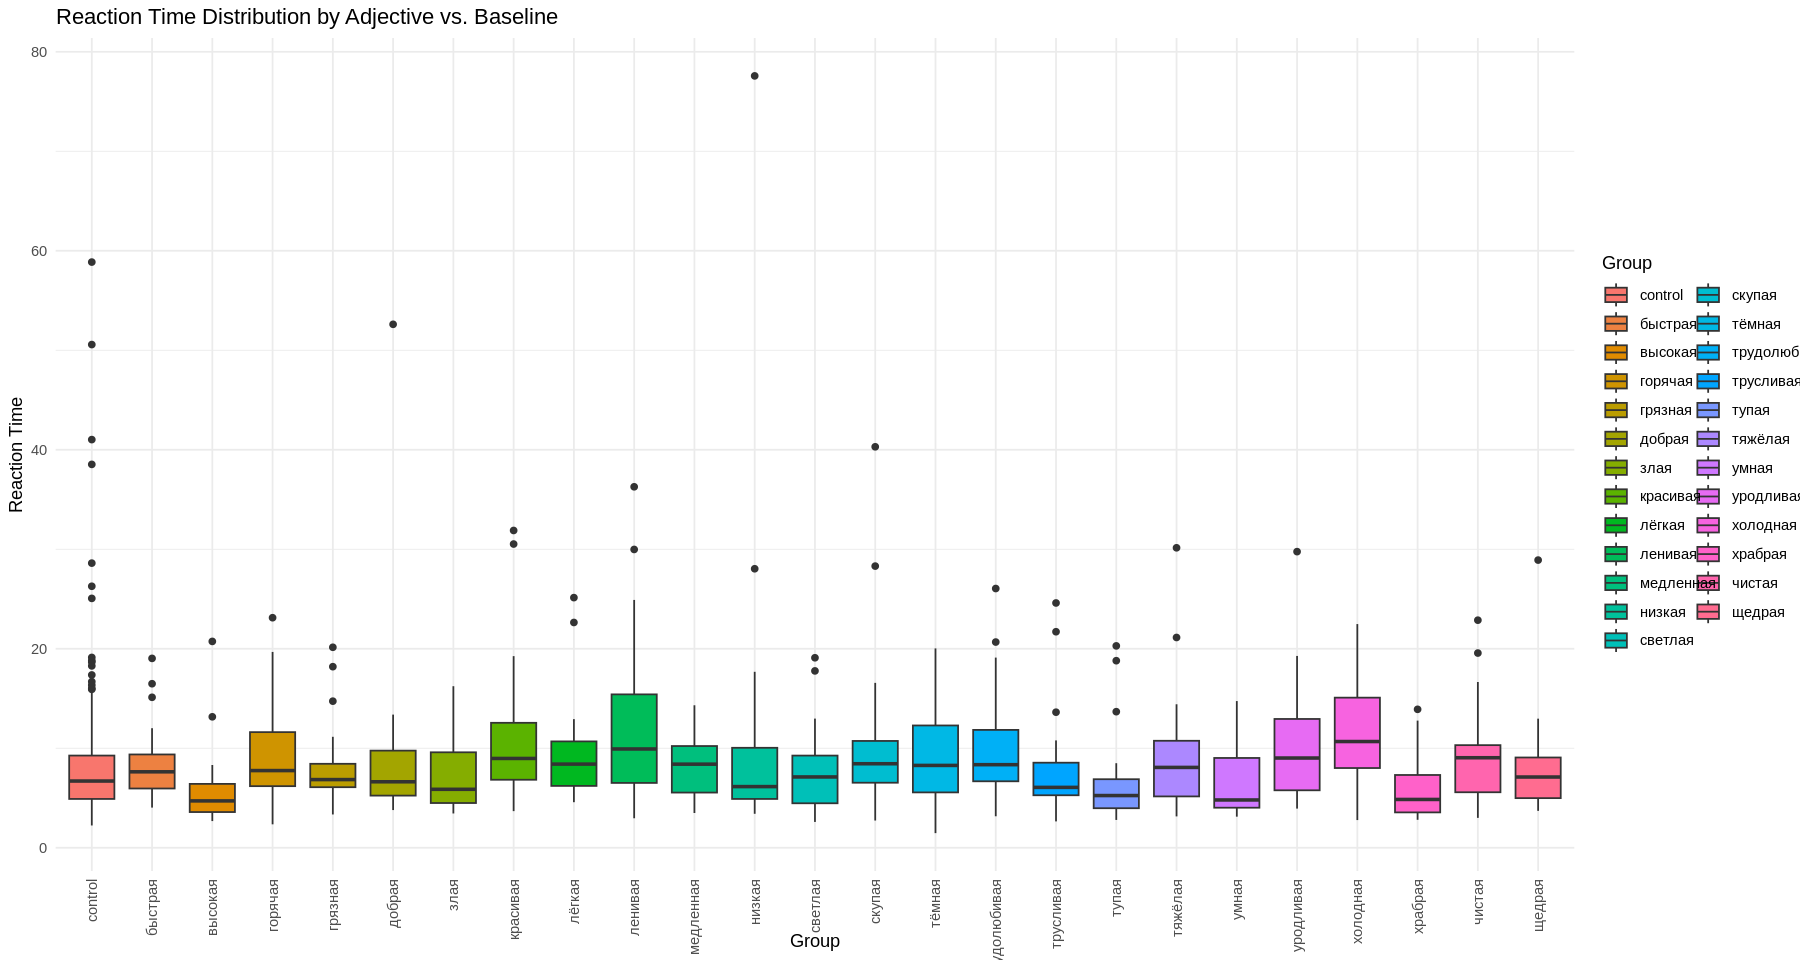

In [110]:
# visualizing

options(repr.plot.width=15, repr.plot.height=8)

plot_data <- rbind(
  data.frame(Group = 'control', clean_time = baseline_data$clean_time),
  data.frame(Group = target_data$adjective, clean_time = target_data$clean_time)
)

ggplot(plot_data, aes(x = Group, y = clean_time, fill = Group)) +
  geom_boxplot() +
  labs(title = 'Reaction Time Distribution by Adjective vs. Baseline',
       x = 'Group', y = 'Reaction Time') +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))